In [2]:
# Commented out IPython magic to ensure Python compatibility.
# Importing Necesarry Packages
import numpy as np
from numpy.ma.core import argmax
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
#import os
import time
from sklearn.metrics import confusion_matrix, accuracy_score, auc
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import models
from keras import layers
from keras.datasets import imdb

In [3]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

17464789/17464789 [==============================] - 0s 0us/step


Training data: 
(50000,)
(50000,)
Classes: 
[0 1]
Number of words: 
88585
Review length: 
Mean 234.76 words (172.911495)


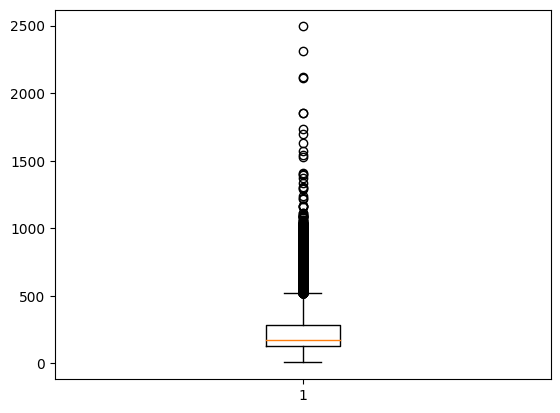

In [4]:
# Exploring the Data
print("Training data: ")
print(X.shape)
print(y.shape)
print("Classes: ")
print(np.unique(y))
print("Number of words: ")
print(len(np.unique(np.hstack(X))))
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result))) # Ploting the review length
plt.boxplot(result)
plt.show()

In [5]:
import numpy as np


In [6]:
def vectorize_sequences(sequences, dimension=5000):
    # Function for vectorizing data
    results = np.zeros((len(sequences), dimension))
    # Creating an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        # Set specific indices of results[i] to 1s
    return results

In [7]:
# Creating Training and Testing Sets and Preprocessing them
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels one-hot encoder
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:

# Creating the DNN Model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
#Set validation set aside
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
# Compiling Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
start_time_m1 = time.time()
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))
total_time_m1 = time.time() - start_time_m1
print("The Dense Convolutional Neural Network 1 layer took %.4f seconds to train." % (total_time_m1))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5173 - acc: 0.7757 - val_loss: 0.3565 - val_acc: 0.8568
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2738 - acc: 0.8968 - val_loss: 0.2949 - val_acc: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2038 - acc: 0.9247 - val_loss: 0.2944 - val_acc: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1643 - acc: 0.9409 - val_loss: 0.3119 - val_acc: 0.8799
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1375 - acc: 0.9524 - val_loss: 0.3373 - val_acc: 0.8711
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1133 - acc: 0.9622 - val_loss: 0.3654 - val_acc: 0.8707
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0910 - acc: 0.9733 - val_loss: 0.3914 - val_acc: 0.8685
Epoch 8/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0724 - a

In [11]:
# Assuming you have a `history` object obtained from model training
history_dict = history.history
print(history_dict.keys())  # To see what keys are available in the history dictionary

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [12]:
# Extracting the training and validation accuracy and loss
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [13]:
# Generating the epochs
epochs = range(1, len(acc) + 1)

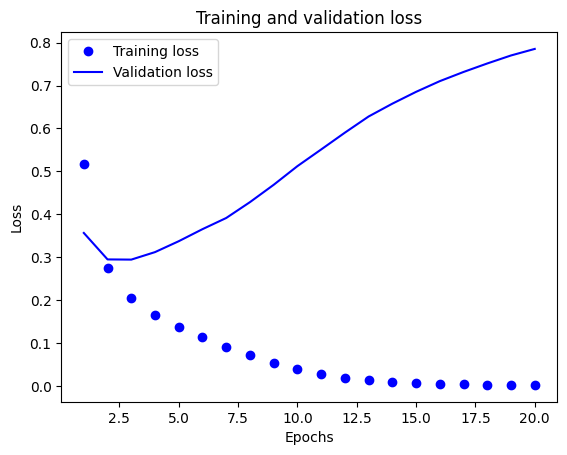

In [14]:
# Plotting model loss
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
plt.clf()
# clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']


<Figure size 640x480 with 0 Axes>

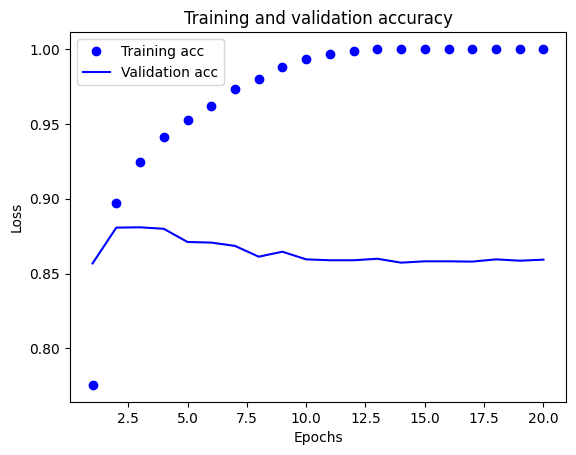

In [16]:
# Plotting model accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
# Model Summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160032    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161121 (629.38 KB)
Trainable params: 161121 (629.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
# Predictions
pred = model.predict(x_test)
classes_x=np.argmax(pred,axis=1)
accuracy_score(y_test,classes_x)


782/782 [==============================] - 4s 5ms/step


0.5

[[12500     0]
 [12500     0]]


Text(0.5, 23.52222222222222, 'Predicted label')

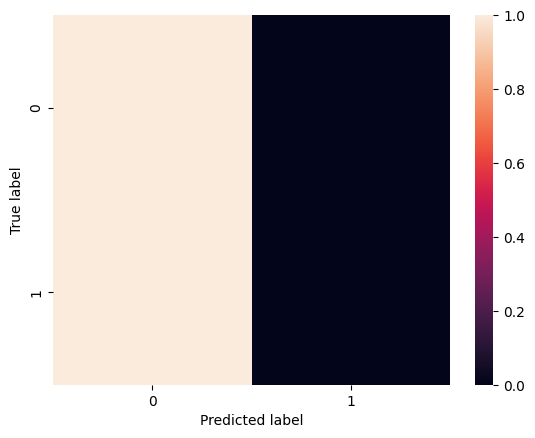

In [19]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, classes_x)
print(conf_mat)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [20]:
#Dense with Two Layer
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [21]:
# Compiling Model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
start_time_m2 = time.time()
history= model2.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))
total_time_m2 = time.time() - start_time_m2
print("The Dense Convolutional Neural Network 2 layers took %.4f seconds to train." % (total_time_m2))

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5962 - acc: 0.6796 - val_loss: 0.4333 - val_acc: 0.8430
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3140 - acc: 0.8888 - val_loss: 0.2922 - val_acc: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2077 - acc: 0.9251 - val_loss: 0.2922 - val_acc: 0.8837
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1581 - acc: 0.9435 - val_loss: 0.3215 - val_acc: 0.8756
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1276 - acc: 0.9561 - val_loss: 0.3561 - val_acc: 0.8728
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0980 - acc: 0.9698 - val_loss: 0.3976 - val_acc: 0.8700
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0716 - acc: 0.9815 - val_loss: 0.4464 - val_acc: 0.8651
Epoch 8/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0487 - a

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

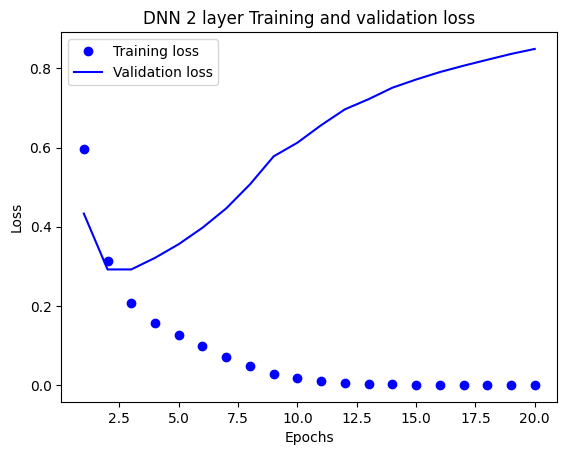

In [23]:
# Plotting Loss
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
plt.title('DNN 2 layer Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

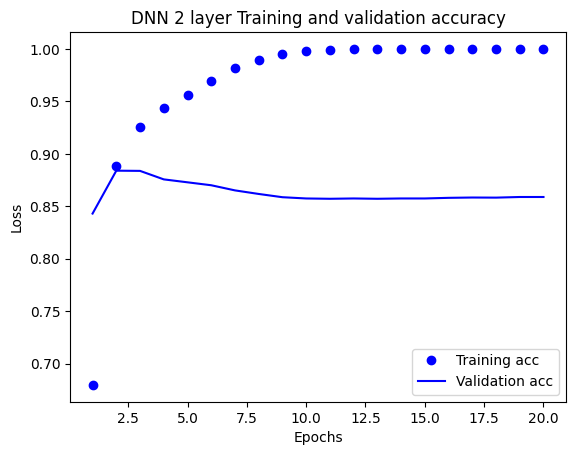

In [24]:
plt.clf()
# clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
# Plotting Accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('DNN 2 layer Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
print(model2.summary())
# Predictions
pred = model2.predict(x_test)
classes_x=np.argmax(pred,axis=-1)
accuracy_score(y_test,classes_x)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160032    
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 162177 (633.50 KB)
Trainable params: 162177 (633.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
782/782 [==============================] - 3s 3ms/step


0.5